In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
from scipy.sparse import dok_array


# Visualize Clustering

We take the output of inference and visualize clusters in topo cluster vs GNN.

In [2]:
df=pd.read_parquet("/storage/afarbin/training/models/comprehensive_query_table_fixed_generator_bs2_model.parquet")

In [3]:
df

,event_id,edge_id,source_id,target_id,true_label,pred_label,is_correct,confidence,confidence_margin,prediction_entropy,...,is_class_2,pred_is_class_2,correct_class_2,is_class_3,pred_is_class_3,correct_class_3,is_class_4,pred_is_class_4,correct_class_4,model_name
0,0,0,2347,16687,3,3,True,0.440225,0.110149,1.094554,...,False,False,False,True,True,True,False,False,False,fixed_generator_bs2_model
1,0,1,30717,30973,0,0,True,0.990100,0.985008,0.065549,...,False,False,False,False,False,False,False,False,False,fixed_generator_bs2_model
2,0,2,32422,39910,2,0,False,0.940087,0.901287,0.282508,...,True,False,False,False,False,False,False,False,False,fixed_generator_bs2_model
3,0,3,29576,173634,0,0,True,0.981115,0.968214,0.109214,...,False,False,False,False,False,False,False,False,False,fixed_generator_bs2_model
4,0,4,149952,150015,0,0,True,0.987783,0.982192,0.078582,...,False,False,False,False,False,False,False,False,False,fixed_generator_bs2_model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251205,4,1250237,14075,24687,0,0,True,0.986090,0.977841,0.086462,...,False,False,False,False,False,False,False,False,False,fixed_generator_bs2_model
6251206,4,1250238,165897,166152,3,0,False,0.901197,0.846871,0.425406,...,False,False,False,True,False,False,False,False,False,fixed_generator_bs2_model
6251207,4,1250239,29912,30169,0,0,True,0.980089,0.970799,0.118693,...,False,False,False,False,False,False,False,False,False,fixed_generator_bs2_model
6251208,4,1250240,117904,117968,0,0,True,0.949709,0.929549,0.256280,...,False,False,False,False,False,False,False,False,False,fixed_generator_bs2_model


In [4]:
print("Sanity Checks...")
print("Number of events:", np.unique(df["event_id"]).shape)
print("Number of unique source cells:", np.unique(df["source_id"]).shape)
print("Number of unique target cells:",np.unique(df["target_id"]).shape)
print("Number of unique source in a single event:",np.unique(df[df["event_id"]==4]["source_id"]).shape)
print("Shape of a event:", df[df["event_id"]==4].shape)


Sanity Checks...
Number of events: (5,)
Number of unique source cells: (187630,)
Number of unique target cells: (187644,)
Number of unique source in a single event: (187630,)
Shape of a event: (1250242, 45)


In [5]:
print("Compare two events to see if pairs in same order:")
a=df[df["event_id"]==2]["source_id"]
b=df[df["event_id"]==4]["source_id"]

print(a.shape,b.shape)
list(zip(a,b))

Compare two events to see if pairs in same order:
(1250242,) (1250242,)


[(30574, 167429),
 (184699, 112924),
 (12368, 63639),
 (185225, 49267),
 (245, 111328),
 (106733, 175676),
 (170690, 87007),
 (169138, 103515),
 (135608, 128098),
 (50895, 50356),
 (120339, 35005),
 (46561, 5286),
 (49560, 159171),
 (136379, 77380),
 (83451, 132923),
 (86719, 170080),
 (18926, 43563),
 (40101, 95705),
 (51209, 151892),
 (107921, 95936),
 (58752, 36225),
 (42936, 126141),
 (104434, 22801),
 (144536, 186722),
 (155825, 49346),
 (91434, 92868),
 (98720, 38653),
 (274, 44511),
 (136702, 38027),
 (181725, 136207),
 (43952, 106251),
 (32514, 157528),
 (111893, 78407),
 (111371, 147056),
 (149956, 117001),
 (51766, 76053),
 (10594, 97676),
 (175452, 89606),
 (87791, 8968),
 (28476, 34709),
 (151861, 63223),
 (114994, 88425),
 (9889, 136781),
 (132394, 127600),
 (104263, 11235),
 (132716, 165645),
 (104946, 79419),
 (58906, 184004),
 (52724, 51571),
 (28061, 34628),
 (93606, 12918),
 (69171, 88526),
 (34710, 170017),
 (19568, 103234),
 (181663, 84698),
 (119110, 149475),
 (964

## Visualize Model Output

In [6]:
from HEPGNNGenerator.pairplots import *

In [7]:
selected_dfs=list()
columns = ["confidence_class_"+str(i) for i in range(0,4)]
columns.append("true_label")
for i in range(5):
    select=df["true_label"]==i
    selected_dfs.append(df[select][columns])

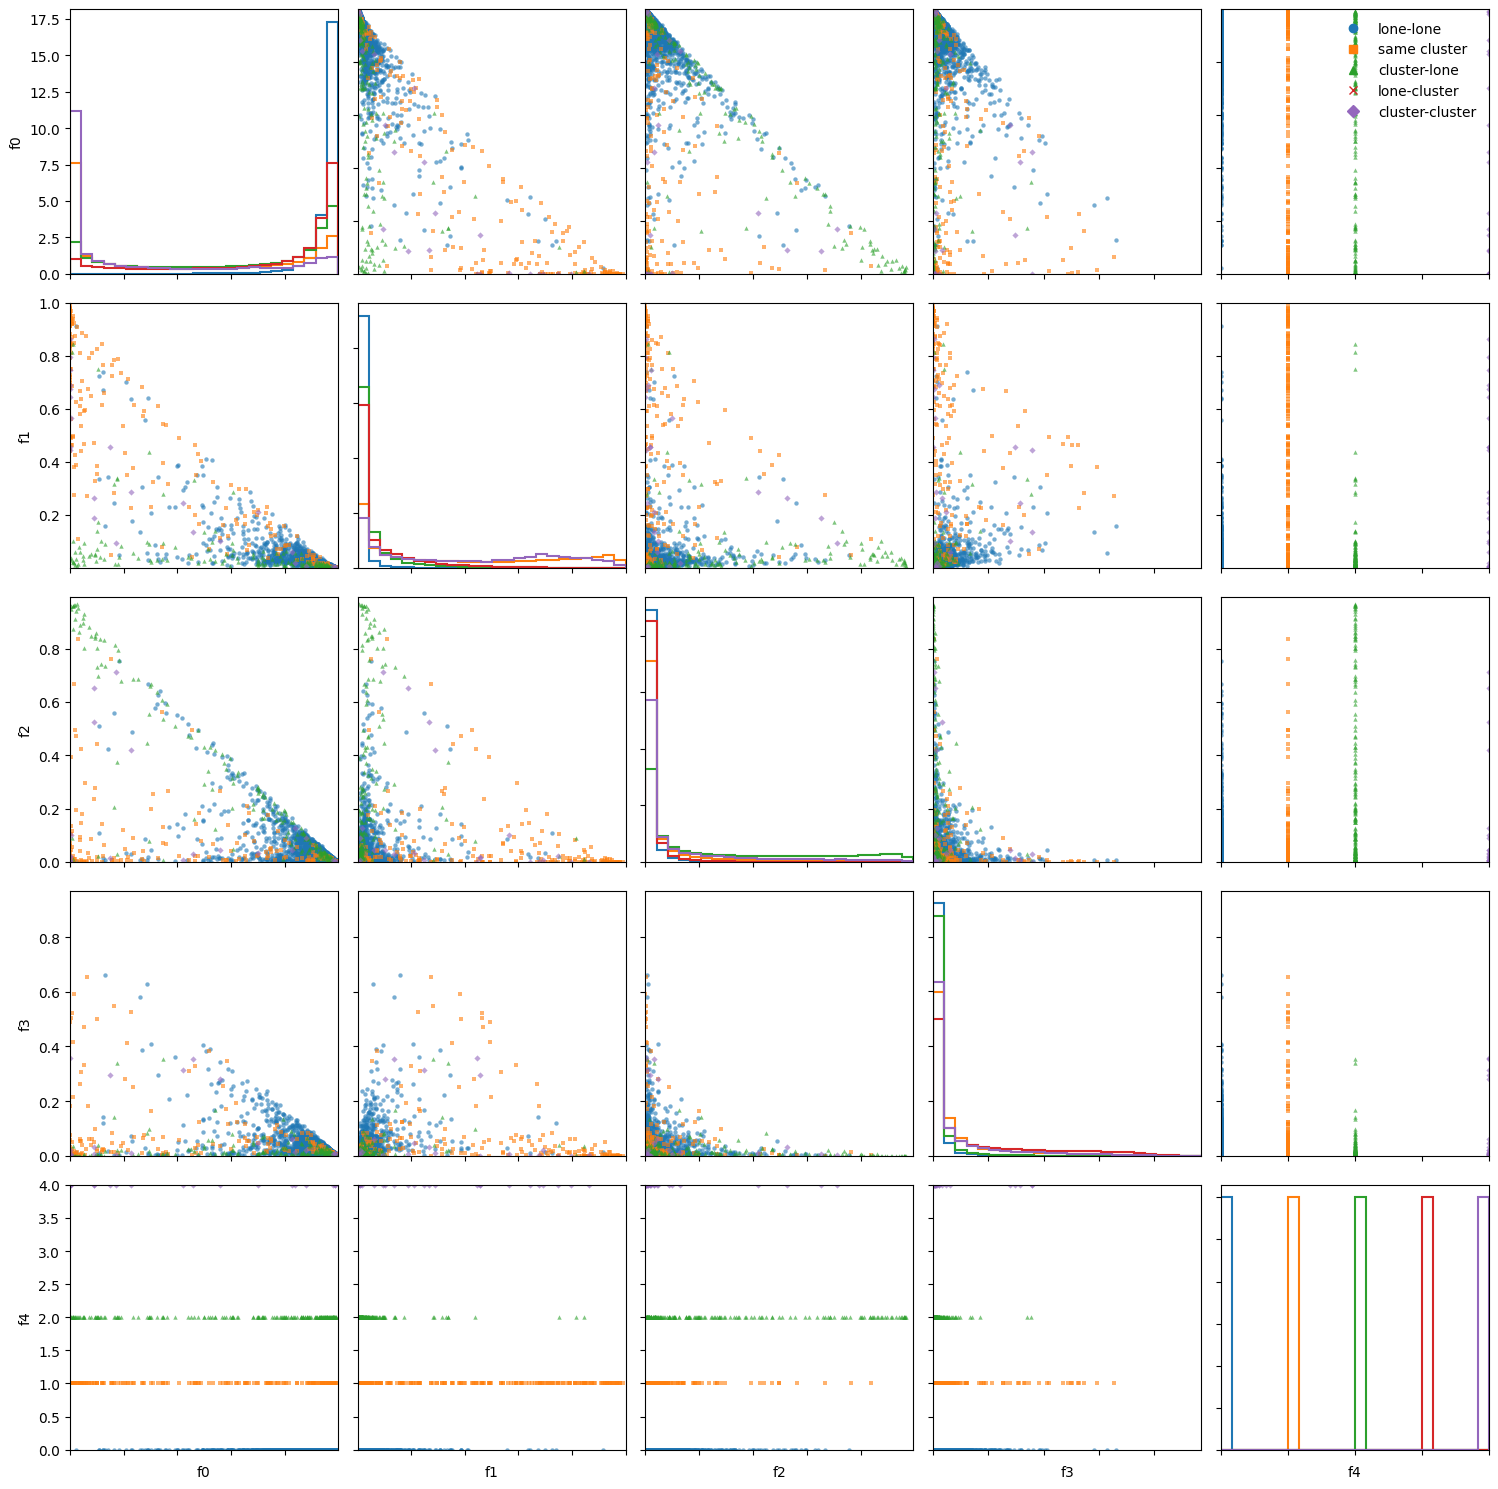

In [8]:
_=pair_plot_multi(selected_dfs,table_labels=["lone-lone","same cluster","cluster-lone","lone-cluster","cluster-cluster"])

# Create adjacency matrix -> clustering

So far we've confirmed that we now have all the pairs. They are not ordered the same between events, but we can fix that.

We want to visualize a part of the matrix. => Select a tight region in eta/phi and layer (missing!).


In [9]:
df_ev0=(df)[df["event_id"]==0]

## Create adjacency matrix using features to ID cells

This was a temp fix to address not having all of the cells.


In [10]:
# Pull out features
feat_names_i = ["snr_source","eta_source","phi_source"] #["eta_i","phi_i","e_i"]
feat_names_j = ["snr_target","eta_target","phi_target"] #["eta_i","phi_i","e_i"]


# Cell ids i -> j : connection
cell_IDs_i = df_ev0[feat_names_i].values.tolist()[:1000]
cell_IDs_j = df_ev0[feat_names_j].values.tolist()[:1000]
connection= df_ev0["true_label"].values.tolist()[:1000]

eta_range = (-.1,.1)
phi_range = (-2*3.14*8/64,2*3.14*.8/64)

# All Sells
# Can't trust the index, so using sell feature matching and building a map.
cell_IDs_0= set(map(tuple,cell_IDs_i))
cell_IDs_1= set(map(tuple,cell_IDs_j))
all_cells= cell_IDs_0.union(cell_IDs_1)

N=len(all_cells)

id_to_cell=dict(zip(range(len(all_cells)),all_cells))
cell_to_id=dict(zip(all_cells,range(len(all_cells))))

adj_0 = dok_array((N,N))

#for i in range(N): adj[i,i]=1

for cell_i, cell_j, conn in zip(cell_IDs_i, cell_IDs_j, connection):
    ID_i = cell_to_id[tuple(cell_i)]
    ID_j = cell_to_id[tuple(cell_j)]
    if conn>0: # or conn==2 or conn==3:
        adj_0[min(ID_i, ID_j),max(ID_i, ID_j)] = 1/conn

adj_0

<Dictionary Of Keys sparse array of dtype 'float64'
	with 68 stored elements and shape (1986, 1986)>

## Create Adjacency Matrix



In [11]:
def create_adj(df_ev0, eta_range = (-.1,.1), phi_range = (-2*3.14*8/64,2*3.14*8/64), diagonal = False):
    # Feature Names
    feat_names_i = ["snr_source","eta_source","phi_source"] #["eta_i","phi_i","e_i"]
    feat_names_j = ["snr_target","eta_target","phi_target"] #["eta_i","phi_i","e_i"]

    # Cell ids i -> j : connection
    cell_IDs_i = df_ev0["source_id"]
    cell_IDs_j = df_ev0["target_id"]
    connection= df_ev0["true_label"]

    eta_i=df_ev0["eta_source"]
    phi_i=df_ev0["phi_source"]
    snr_i=df_ev0["snr_source"]

    eta_j=df_ev0["eta_target"]
    phi_j=df_ev0["phi_target"]
    snr_j=df_ev0["snr_target"]

    # Select Region
    eta_pass_i = np.logical_and(eta_i>eta_range[0],eta_i<eta_range[1])
    #eta_pass_j = np.logical_and(eta_j>eta_range[0],eta_j<eta_range[1])

    phi_pass_i = np.logical_and(phi_i>phi_range[0], phi_i<phi_range[1])
    #phi_pass_j = np.logical_and(phi_j>phi_range[0], phi_j<phi_range[1])

    select_i = np.logical_and(eta_pass_i, phi_pass_i)
    #select_j = np.logical_and(eta_pass_j, phi_pass_j)


    # From here on, we select based on source only
    cells_i = set(cell_IDs_i[select_i].values.tolist())
    cells_j = set(cell_IDs_j[select_i].values.tolist())
    conns = connection[select_i]

    # Determine size of the Adjacency Matrix
    all_cells= cells_i.union(cells_j)
    N=len(all_cells)

    # Map cells to rows/columns
    #id_to_cell=dict(zip(range(N),all_cells))
    cell_to_id=dict(zip(all_cells,range(N)))

    adj = dok_array((N,N))

    if diagonal:
        for i in range(N): adj[i,i]=1

    #Fill the Adjacency Matrix
    for cell_i, cell_j, conn in zip(cells_i, cells_j, conns ):
        ID_i = cell_to_id[cell_i]
        ID_j = cell_to_id[cell_j]
        if conn>0: # or conn==2 or conn==3:
            adj[min(ID_i, ID_j),max(ID_i, ID_j)] = 1./conn

    return adj, select_i
                    #{"select_i":select_i,
                    # "eta_i":eta_i,"eta_j":eta_j,
                    # "phi_i":phi_i,"phi_j":phi_j,
                    # "snr_i":snr_i,"snr_j":snr_j}

In [12]:
# Test
n=3
adj, select_i = create_adj(df_ev0, eta_range = (-n,n), phi_range = (-2*3.14*4*n/64,2*3.14*4*n/64), diagonal = False)
# Visualize the Matrix in space of the Adj index
i,j = np.where(adj.toarray()!=0)
plt.scatter(i,j)

/home/afarbin/.virtualenvs/GNNCalo/lib/python3.10/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/afarbin/.virtualenvs/GNNCalo/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


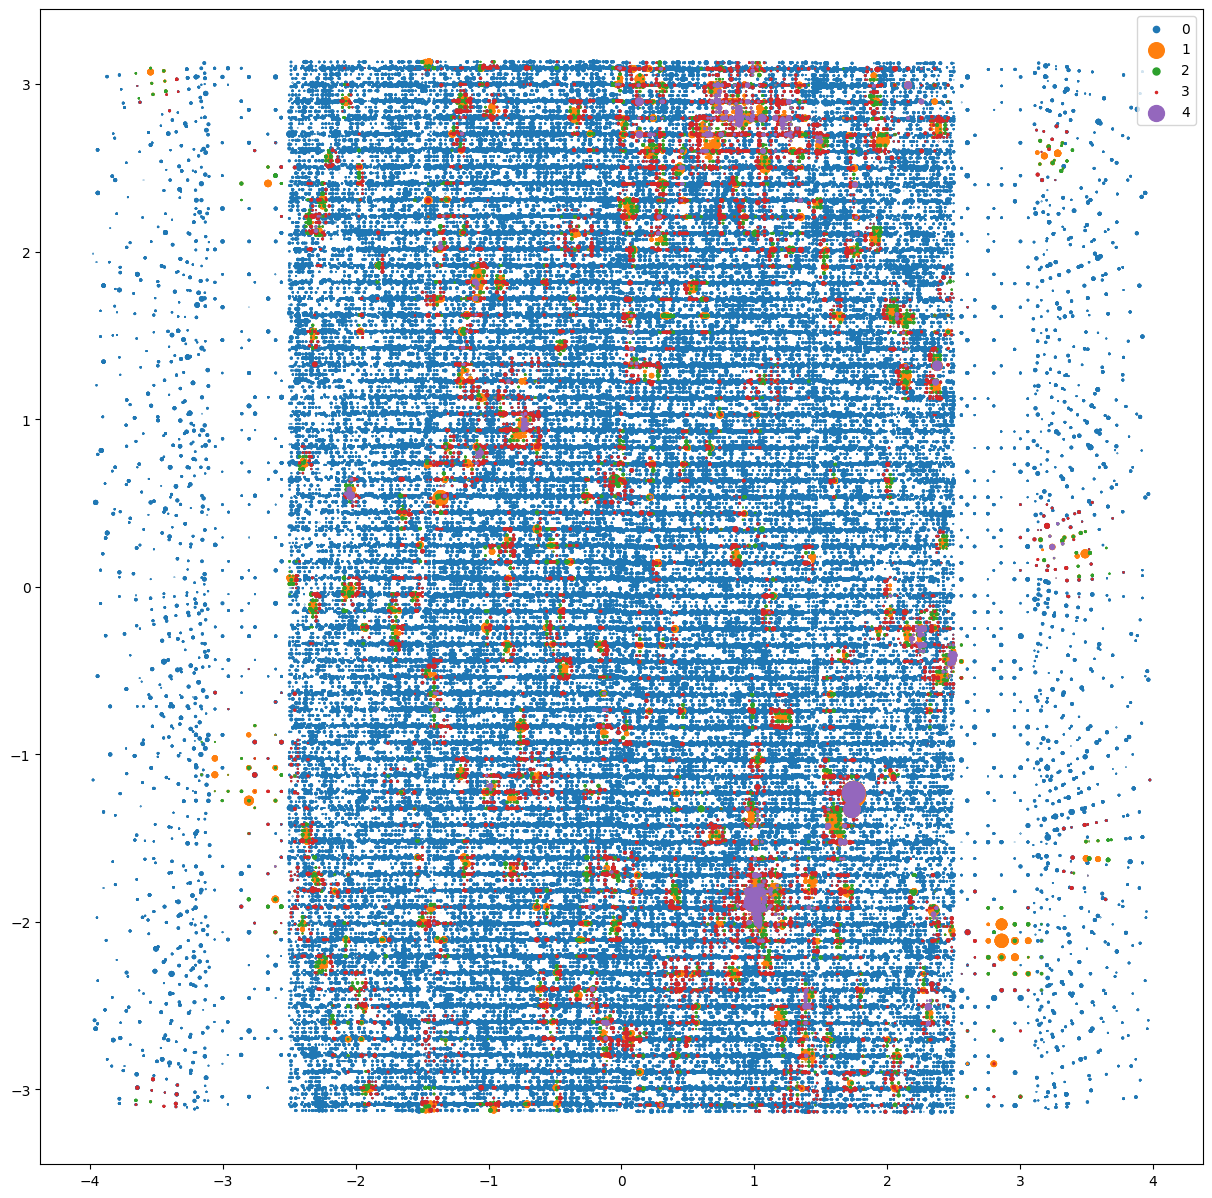

In [44]:
# Visualize the Matrix in space of the Adj index

def plot_region_0(df_ev0, eta_range = (-4,4), phi_range = (-4,4), diagonal = False, min_con=1):
    adj, d = create_adj(df_ev0,eta_range, phi_range, diagonal)
    select_i=d#["select_i"]

    #i,j = np.where(adj.toarray()!=0)
    #plt.scatter(i,j)
    #plt.show()
    plt.figure(figsize=(15,15))

    for con in range(min_con,5):
        select_con = np.logical_and(select_i, df_ev0["true_label"]==con)
        plt.scatter(df_ev0["eta_source"][select_con],
                    df_ev0["phi_source"][select_con],
                    label=str(con),
                    s=3*df_ev0["snr_source"][select_con])

        #df_ev0["true_label"][select_con])

    plt.legend()
    plt.show()
    return adj,select_i

#adj,select_i=plot_region(df_ev0,(0.,2.),(-3.,-1.))
adj,select_i=plot_region_0(df_ev0,min_con=0)


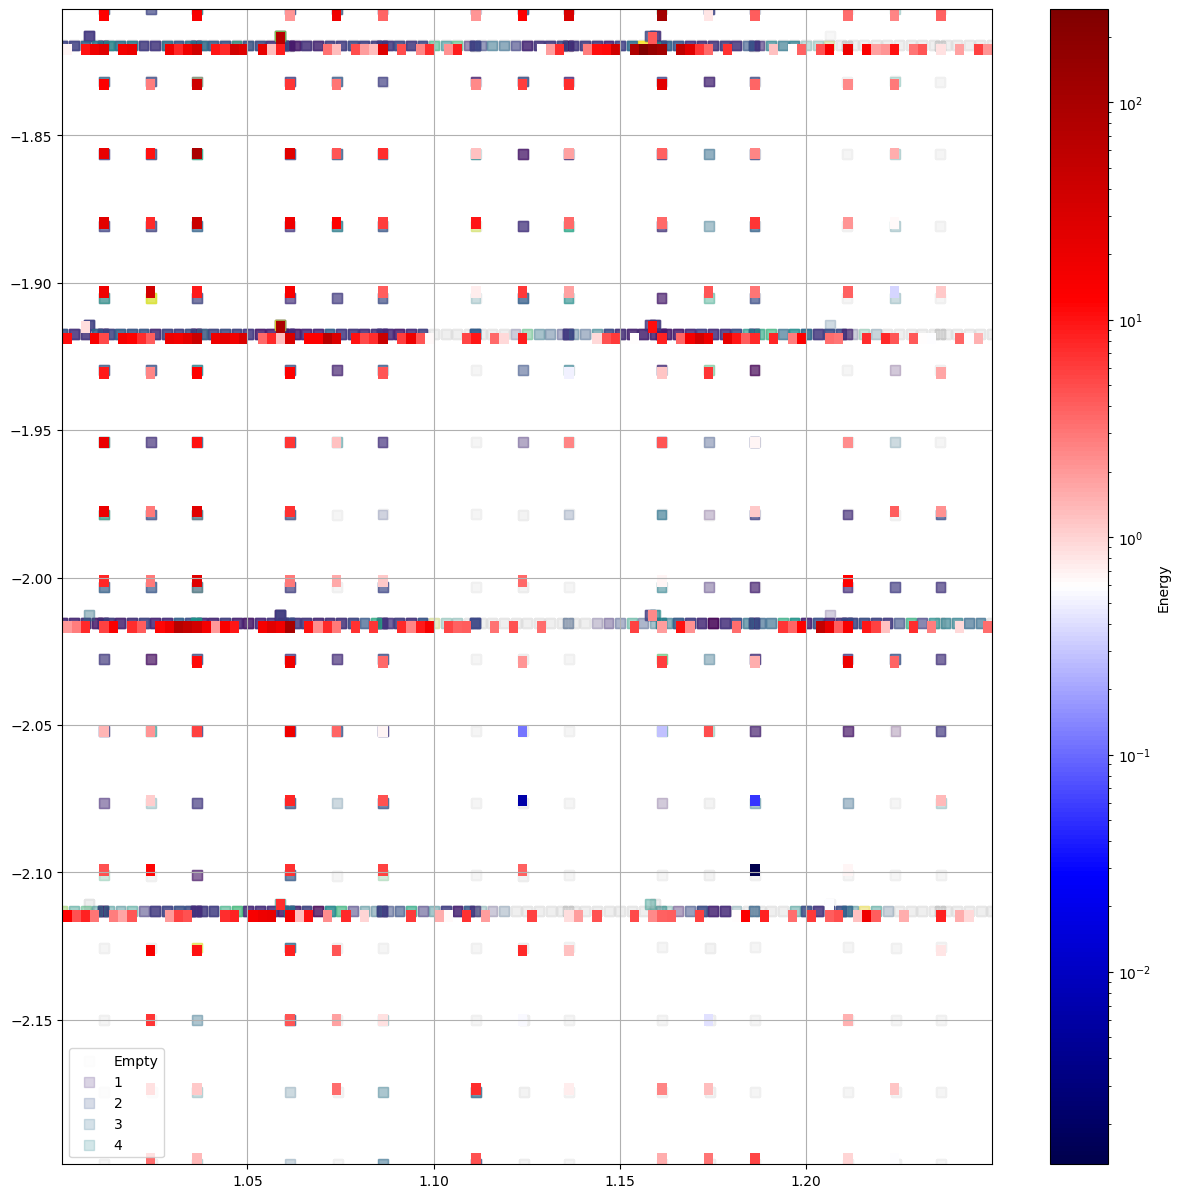

In [122]:
# Visualize the Matrix in space of the Adj index
import matplotlib.colors as mcolors

def plot_region(df_ev0, eta_range = (-4,4), phi_range = (-4,4), diagonal = False, min_con=1,
                **kwargs):

    if len(kwargs.keys())==0:
        kwargs={"bins":100,
                "cmap":'seismic',
                "norm":mcolors.LogNorm(),
                "cmin":1e-5}

    adj, d = create_adj(df_ev0,eta_range, phi_range, diagonal)
    select_i=d#["select_i"]

    #i,j = np.where(adj.toarray()!=0)
    #plt.scatter(i,j)
    #plt.show()
    fig,ax=plt.subplots(figsize=(15,15))

    plt.scatter(df_ev0["eta_source"][select_i],
                    df_ev0["phi_source"][select_i],
                    label="Empty",
                    marker="s",
                    color="grey",
                    s=51,#*df_ev0["snr_source"][select_con],
                    alpha=0.01)

    cc=["r","g","b","y","m"]

    for con in range(1,5):
        select_con = np.logical_and(select_i, df_ev0["true_label"]==con)
        plt.scatter(df_ev0["eta_source"][select_con],
                    df_ev0["phi_source"][select_con],
                    label=str(con),
                    marker="s",
                    c=df_ev0["snr_source"][select_con],
                    s=50,#*df_ev0["snr_source"][select_con],
                    alpha=0.2)

    plt.legend()

    counts, xedges, yedges, im = plt.hist2d(df_ev0["eta_source"][select_i],
                                    df_ev0["phi_source"][select_i],
                                    weights=df_ev0["snr_source"][select_i],
                                    **kwargs)

    fig.colorbar(im, ax=ax, label='Energy')
    ax.grid(True)
        #df_ev0["true_label"][select_con])

    plt.show()
    return adj,select_i

adj,select_i=plot_region(df_ev0,(1,1.25),(-2.2,-1.8))
#adj,select_i=plot_region(df_ev0,min_con=0)


************************************************** Event: 0 **************************************************


/tmp/ipykernel_267762/1614365478.py:31: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/tmp/ipykernel_267762/1614365478.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


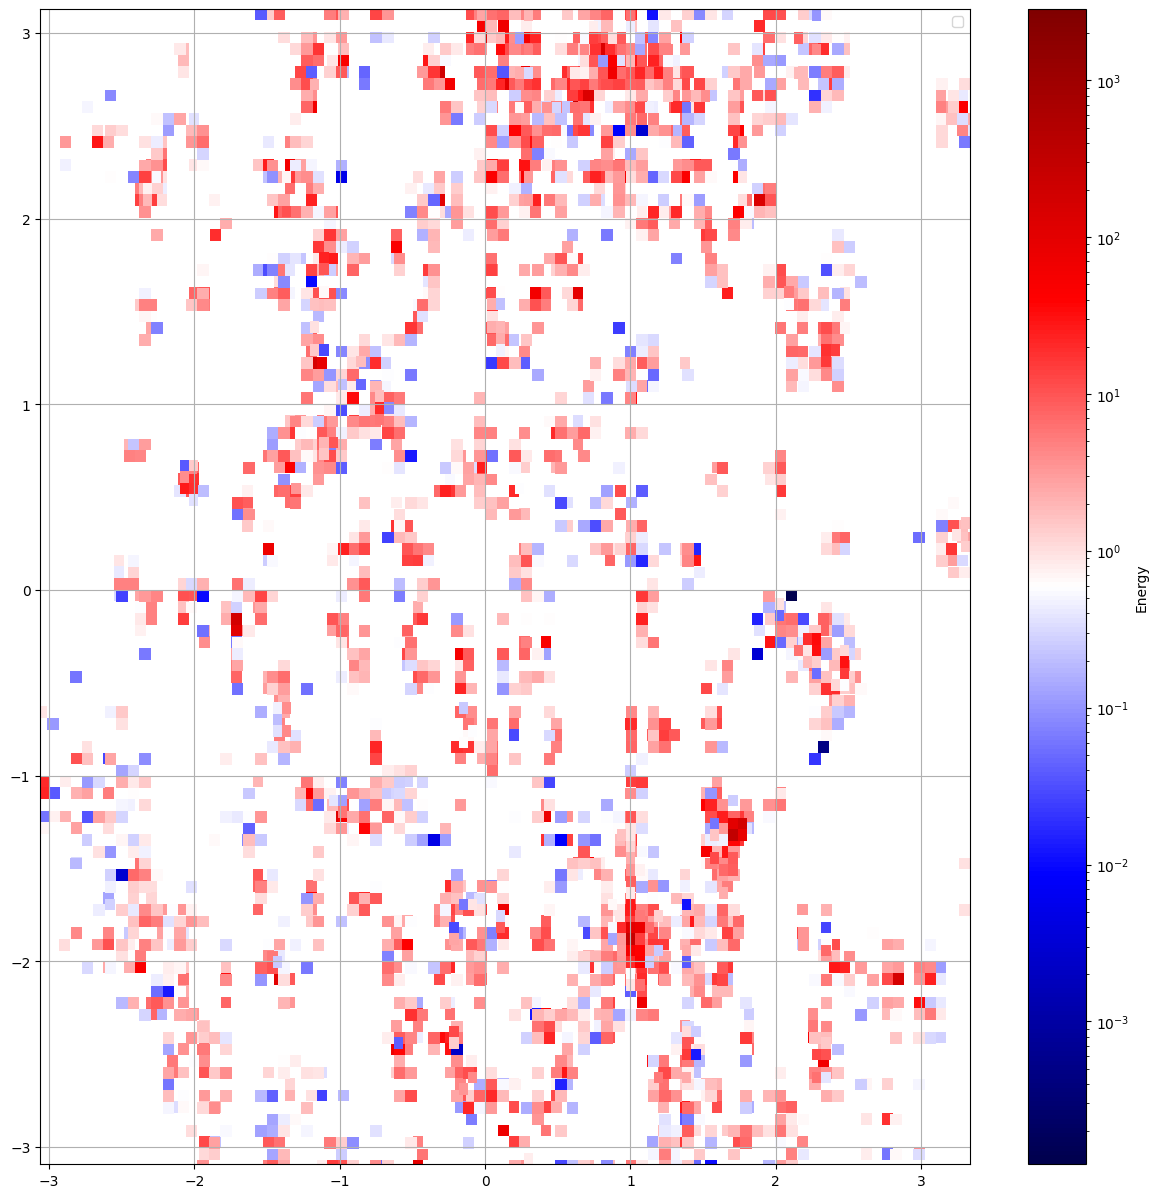

************************************************** Event: 1 **************************************************


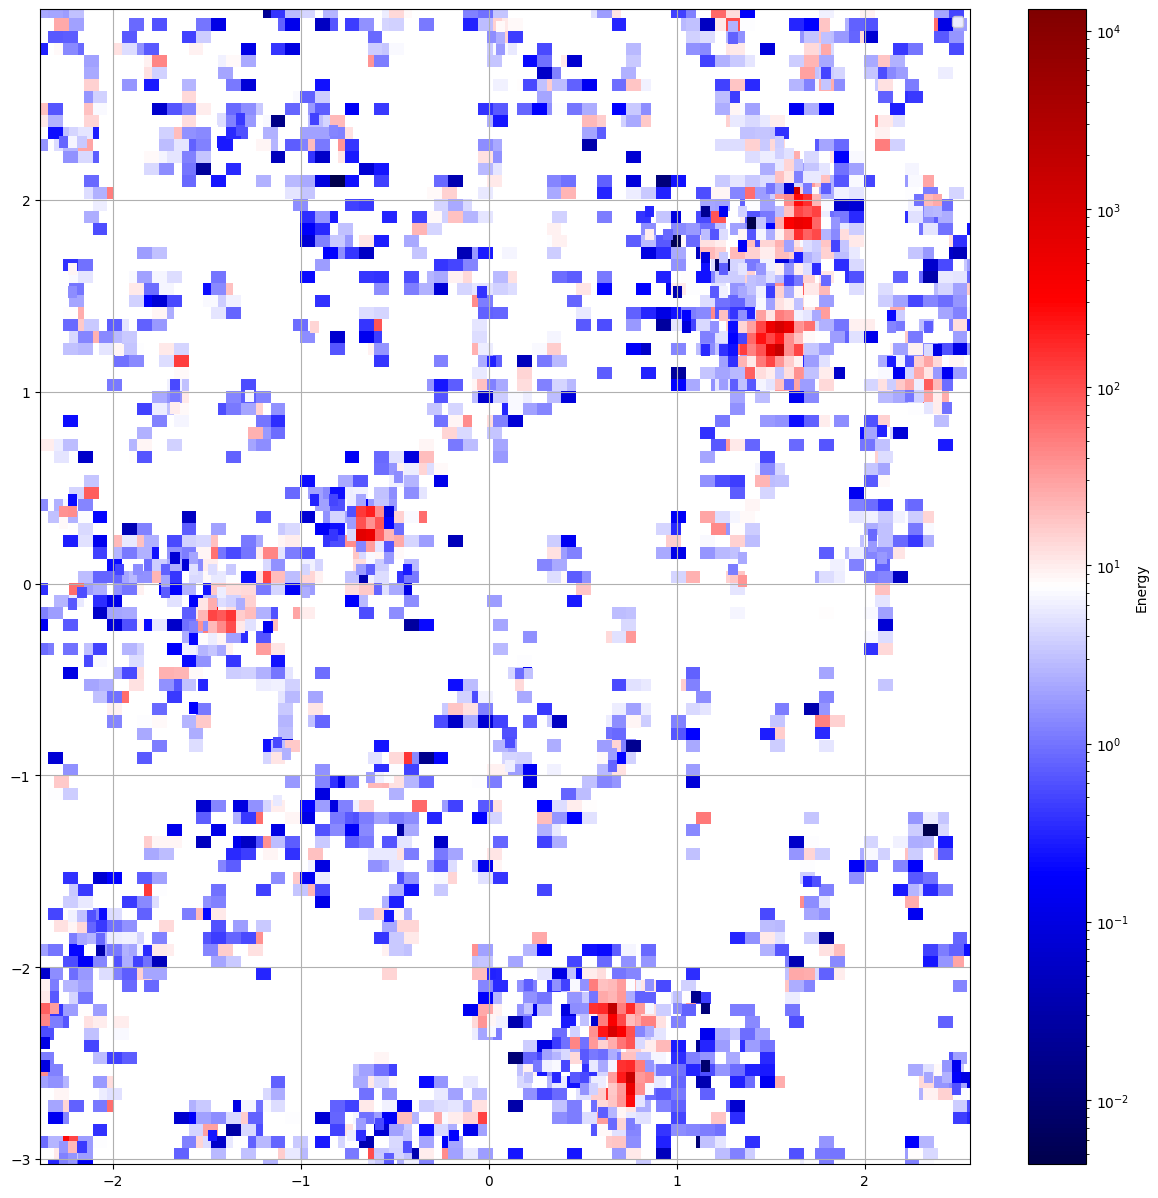

************************************************** Event: 2 **************************************************


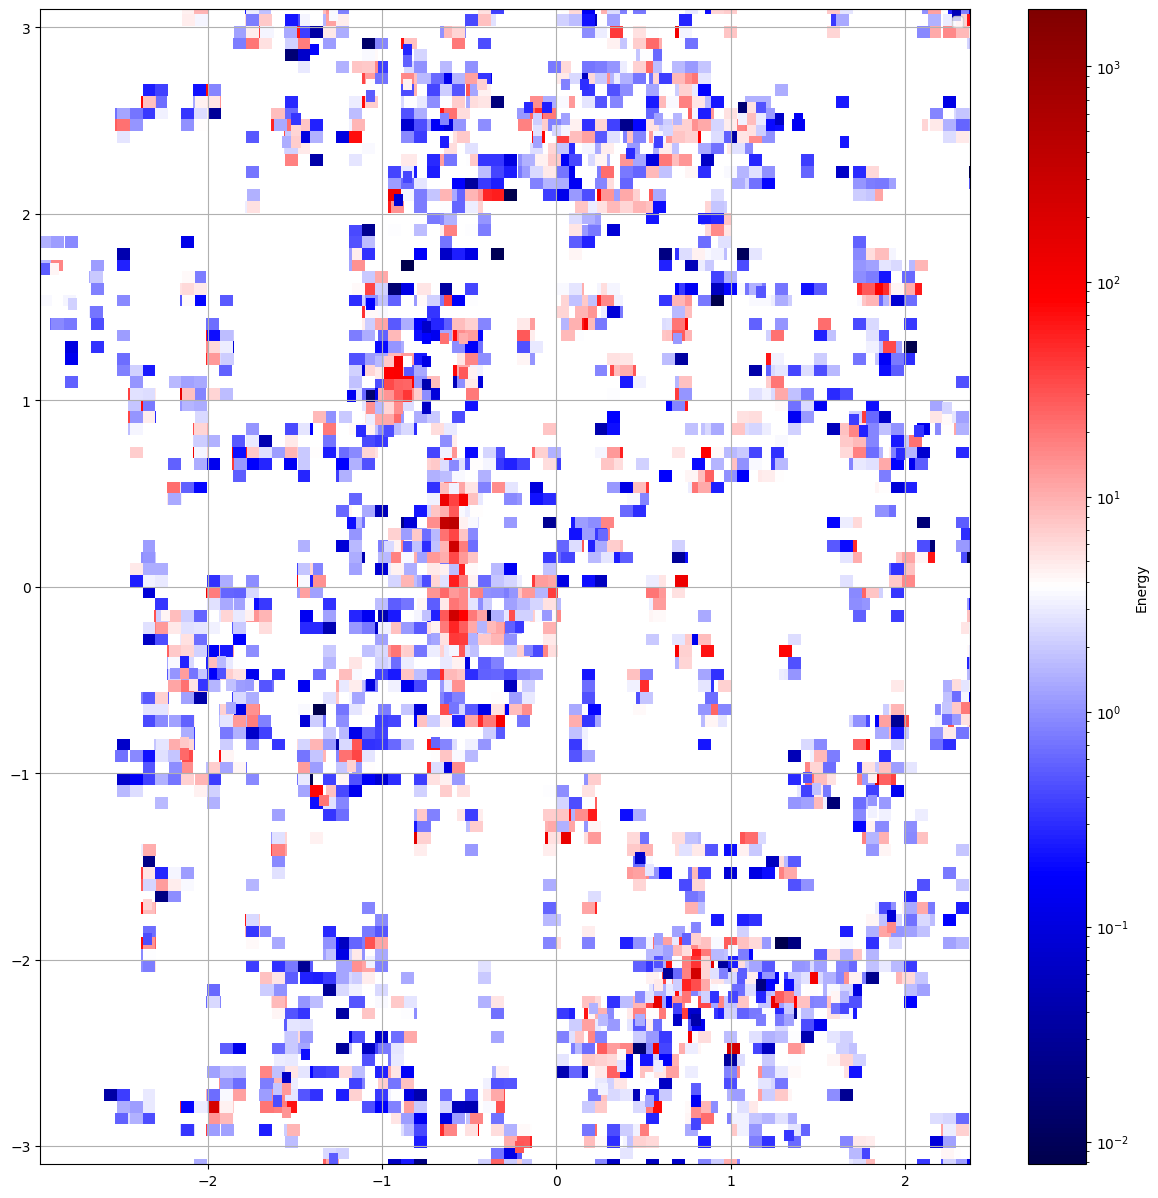

************************************************** Event: 3 **************************************************


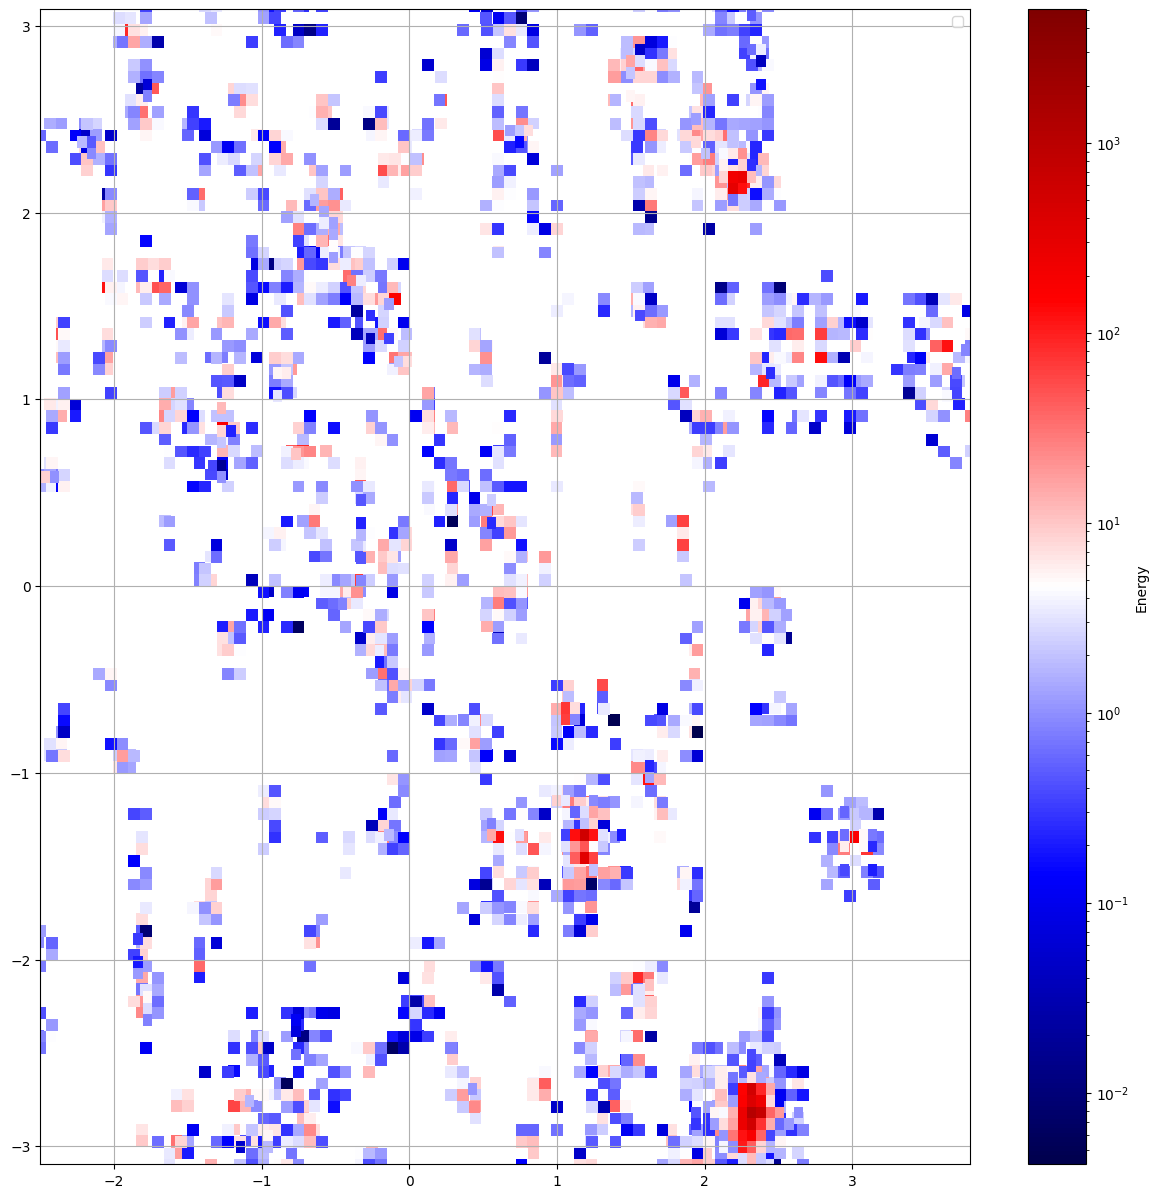

************************************************** Event: 4 **************************************************


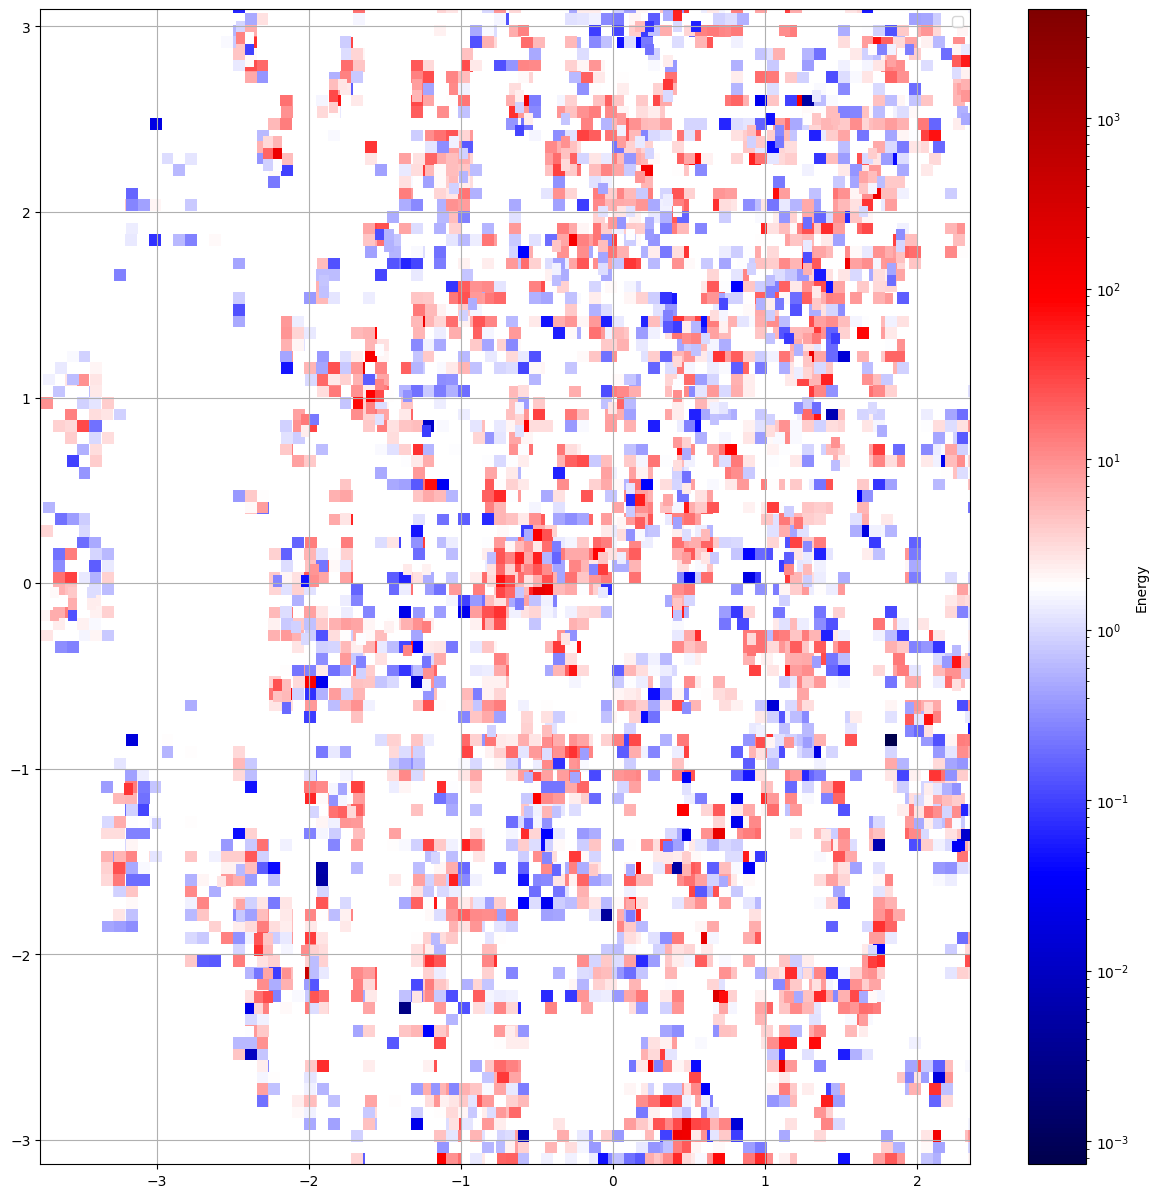

In [87]:
for i_evt in np.unique(df["event_id"]):
    print("*"*50,"Event:",i_evt,"*"*50)
    df_ev=df[df["event_id"]==i_evt]
    adj,select_i=plot_region(df_ev)



In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.sparse import issparse

def visualize_adjacency(adj, labels=None, show_graph=True, show_matrix=True,
                        heatmap=True, max_dense_size=2000):
    """
    Visualize an adjacency matrix (dense or sparse) as both a heatmap and a graph.

    Parameters
    ----------
    adj : array-like or scipy.sparse matrix
        The adjacency matrix (dense NumPy array or sparse).
    labels : list of str, optional
        Node labels. If None, nodes will be numbered 0..N-1.
    show_graph : bool, default=True
        If True, show graph visualization.
    show_matrix : bool, default=True
        If True, show adjacency matrix (spy or heatmap).
    heatmap : bool, default=True
        If True, attempt to show adjacency as heatmap (dense).
        If False, use sparse pattern plot (spy).
    max_dense_size : int, default=2000
        Max dimension allowed for dense conversion. Larger uses spy().
    """
    if issparse(adj):
        n = adj.shape[0]
    else:
        n = len(adj)

    if labels is None:
        labels = list(range(n))

    # Matrix view
    if show_matrix:
        plt.figure(figsize=(6, 5))
        if issparse(adj) and (heatmap and n <= max_dense_size):
            A = adj.toarray()
            plt.imshow(A, cmap="viridis", interpolation="nearest")
            plt.colorbar(label="Edge weight")
            plt.title("Adjacency Matrix Heatmap")
        elif issparse(adj):
            plt.spy(adj, markersize=5)
            plt.title("Adjacency Matrix Sparsity Pattern")
        else:
            plt.imshow(adj, cmap="viridis", interpolation="nearest")
            plt.colorbar(label="Edge weight")
            plt.title("Adjacency Matrix Heatmap")
        plt.xlabel("Node")
        plt.ylabel("Node")
        plt.show()

    # Graph view
    if show_graph:
        if issparse(adj):
            G = nx.from_scipy_sparse_array(adj)
        else:
            G = nx.from_numpy_array(adj)

        pos = nx.spring_layout(G, seed=42)  # reproducible layout
        plt.figure(figsize=(6, 6))
        nx.draw(
            G, pos, with_labels=True, labels={i: labels[i] for i in range(n)},
            node_size=500, node_color="skyblue", edge_color="gray", font_size=10
        )
        plt.title("Graph from Adjacency Matrix")
        plt.show()


visualize_adjacency(adj, heatmap=True)

In [ ]:
adj[40282].nonzero()

In [ ]:
labels[40282]

In [ ]:
np.where(labels== labels[40282])

In [ ]:
labels[:100]

In [ ]:
adj

In [ ]:
cell_map = dict()
for cell_ID in list(map(tuple,cell_IDs_i)):
    if cell_ID in cell_map.keys():
        cell_map[cell_ID]+=1
    else:
        cell_map[cell_ID]=1

In [ ]:
cell_map.values()